**BOTNET DETECTION (Friday-WorkingHours-Morning.pcap_ICSX.csv)**

In [1]:
from google.colab import drive
drive.mount('/content/drive') #mounting to the drive to access the dataset

Mounted at /content/drive


**Project Overview**

SentinelNet is an AI-Powered Network Intrusion Dtection System (NIDS) designed to detect malicious network traffic using supervised and unsupervised Machine learning Models.

**Module 1 Dataset Acquisition and Loading**

The Dataset used in this project is CICIDS2017, obtained from the official source of the Canadian Institute for Cybersecurity.
Dataset:https://www.unb.ca/cic/datasets/ids-2017.html


**importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path) #it reads the dataset from the drive

In [3]:
df #it shows the data in the dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**Basic EDA**

In [4]:
# Inspect the data
print("Inspecting the updated df3 DataFrame:")
display(df.info()) #it shows the information about the dataset


Inspecting the updated df3 DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd P

None

**Module 2 Data Cleaning and Preprocessing**

In [5]:
#checking the null values
display(df.isnull().sum()) #it shows the null values if there any

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [6]:
#checking for the duplicate values
display(df.duplicated().sum())

np.int64(81909)

In [7]:
print("Shape of the DataFrame:")
display(df.shape) # shape shows number of rows and columns in the dataset

Shape of the DataFrame:


(692703, 79)

In [8]:
print("\nData types of each column:")
display(df.info())
# info() shows columns names,their data types and non null values


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Leng

None

In [9]:
print("\nDescriptive statistics for numerical columns:")
display(df.describe())
#describe() shows the count, mean,standard, minimum,25%,50%,75% and maximum values of the dataset


Descriptive statistics for numerical columns:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,41.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,56.666667,128.916917,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,65487.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


**1.Handle Duplicate Values**

In [10]:
initial_rows = df.shape[0]
print(f"Initial number of rows: {initial_rows}")
duplicate_rows = df.duplicated().sum() # checking for duplicated rows
print(f"Number of duplicate rows: {duplicate_rows}")
df.drop_duplicates(inplace=True) #deleting the duplicate rows
rows_after_dropping = df.shape[0]
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")
duplicate_rows_after_dropping = df.duplicated().sum() #sum of duplicate rows after dropping
print(f"Number of duplicate rows after dropping: {duplicate_rows_after_dropping}")

Initial number of rows: 692703
Number of duplicate rows: 81909
Number of rows after dropping duplicates: 610794
Number of duplicate rows after dropping: 0


**2.Missing Values**

In [11]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=np.number)
# Fill missing values with the median of each numerical column
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.median())
print("Number of missing values after filling:")
display(df.isnull().sum().sum())

Number of missing values after filling:


np.int64(0)

**Visualizing the Missing Values**

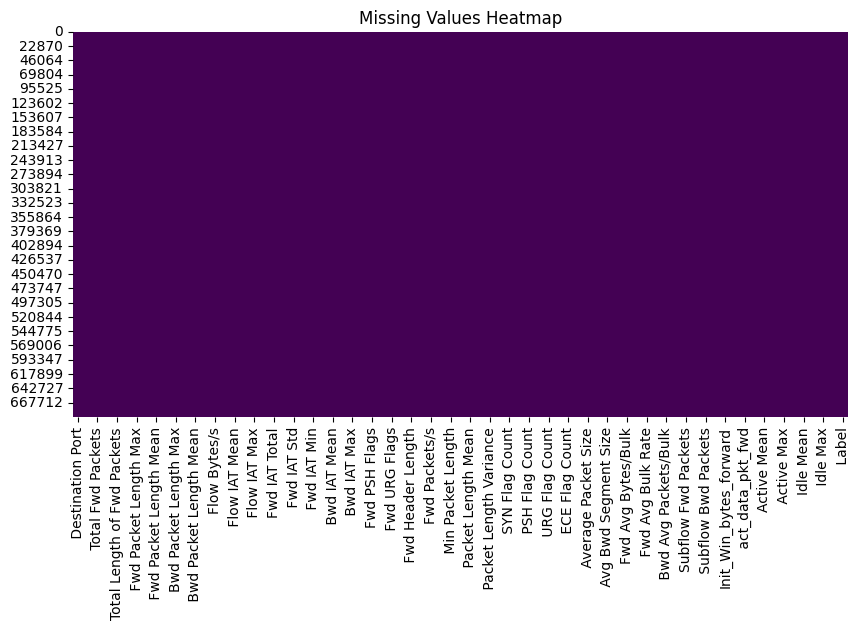

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Handle irrelevant features in the dataset, fill missing values with the median, visualize missing values, and apply advanced EDA and dataset exploration.

## 3.Identify irrelevant features








**Reasoning**:
Analyze the unique values in each column to identify potentially irrelevant features based on cardinality.



In [13]:
unique_counts = df.nunique()
print("Number of unique values for each column:")
display(unique_counts)

# Identify columns with high cardinality (e.g., more than 90% unique values)
high_cardinality_cols = unique_counts[unique_counts / len(df) > 0.9].index.tolist()
print("\nColumns with high cardinality:")
display(high_cardinality_cols)

# Identify columns with very low cardinality (e.g., 1 or 2 unique values)
low_cardinality_cols = unique_counts[unique_counts <= 2].index.tolist()
print("\nColumns with low cardinality:")
display(low_cardinality_cols)



Number of unique values for each column:


,0
Destination Port,30094
Flow Duration,363185
Total Fwd Packets,685
Total Backward Packets,859
Total Length of Fwd Packets,9380
...,...
Idle Mean,37601
Idle Std,41528
Idle Max,21986
Idle Min,43869



Columns with high cardinality:


[]


Columns with low cardinality:


['Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']


Based on the identified columns with high and low cardinality, and a general understanding of network traffic data, I will identify the irrelevant features. Some columns with low cardinality might still be relevant if they represent important flags or binary states. Columns with extremely high cardinality that are not identifiers or timestamps are likely irrelevant for a general botnet detection model. After identifying the irrelevant columns, I will drop them from the DataFrame.



## Implement handling of irrelavant features

Implement the removal or of the identified irrelevant features in the DataFrame.


In [14]:
# Manually identify irrelevant columns based on unique value analysis and domain knowledge
# ' Flow Bytes/s' and ' Flow Packets/s' can have int values, let's inspect them later
# ' Label' is the target variable, so it should not be dropped
low_cardinality_cols = unique_counts[unique_counts <= 2].index.tolist()
irrelevant_cols = low_cardinality_cols + [' Flow Bytes/s', ' Flow Packets/s']


print(f"\nIrrelevant columns identified: {irrelevant_cols}")

# Drop the identified irrelevant columns
#df.drop(columns=irrelevant_cols, inplace=True)

print("\nDataFrame shape after dropping irrelevant columns:")
display(df.shape)


Irrelevant columns identified: ['Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', ' Flow Bytes/s', ' Flow Packets/s']

DataFrame shape after dropping irrelevant columns:


(610794, 79)

In [15]:
# Clean column names by removing leading spaces
df.columns = df.columns.str.strip()

unique_counts = df.nunique()
print("Number of unique values for each column:")
display(unique_counts)

# Identify columns with high cardinality (e.g., more than 90% unique values)
high_cardinality_cols = unique_counts[unique_counts / len(df) > 0.9].index.tolist()
print("\nColumns with high cardinality:")
display(high_cardinality_cols)

# Identify columns with very low cardinality (e.g., 1 or 2 unique values)
low_cardinality_cols = unique_counts[unique_counts <= 2].index.tolist()
print("\nColumns with low cardinality:")
display(low_cardinality_cols)

# Manually identify irrelevant columns based on unique value analysis and domain knowledge
# ' Flow Bytes/s' and ' Flow Packets/s' can have inf values, let's inspect them later
# ' Label' is the target variable, so it should not be dropped
irrelevant_cols = low_cardinality_cols + ['Flow Bytes/s', 'Flow Packets/s']
if 'Label' in irrelevant_cols:
    irrelevant_cols.remove('Label') # Do not drop the target variable

print(f"\nIrrelevant columns identified: {irrelevant_cols}")

# Drop the identified irrelevant columns
df.drop(columns=irrelevant_cols, inplace=True)

print("\nDataFrame shape after dropping irrelevant columns:")
display(df.shape)

Number of unique values for each column:


,0
Destination Port,30094
Flow Duration,363185
Total Fwd Packets,685
Total Backward Packets,859
Total Length of Fwd Packets,9380
...,...
Idle Mean,37601
Idle Std,41528
Idle Max,21986
Idle Min,43869



Columns with high cardinality:


[]


Columns with low cardinality:


['Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 'CWE Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']


Irrelevant columns identified: ['Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Flow Bytes/s', 'Flow Packets/s']

DataFrame shape after dropping irrelevant columns:


(610794, 59)

## Justify removal/transformation
Justification for removing irrelevant features:

Columns with very low cardinality (1 or 2 unique values) were removed because they provide little to no discriminative information for the botnet detection model. Features that are constant or nearly constant across all instances do not help in distinguishing between different classes (BENIGN and BOT).
The following columns were identified and removed due to very low cardinality: ['Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Label']

'Flow Bytes/s' and 'Flow Packets/s' were removed because these features can contain infinite values (inf), which can cause issues with many machine learning algorithms. Handling these infinite values (e.g., replacing them with a large number or the median) can introduce bias or distort the data distribution. Removing them is a safer approach if their presence is problematic.

No columns with high cardinality (more than 90% unique values) were identified for removal based on the initial threshold. High cardinality features can sometimes be problematic for certain models, but in this case, none met the criteria for automatic removal.



## Verify changes

Verifying that the irrelevant features have been removed from the DataFrame.



Print the shape and column names of the DataFrame to verify that the irrelevant features have been removed.



In [16]:
print("Shape of the DataFrame after removing irrelevant features:")
display(df.shape)
print("\nColumns in the DataFrame after removing irrelevant features:")
display(df.columns.tolist())

Shape of the DataFrame after removing irrelevant features:


(610794, 59)


Columns in the DataFrame after removing irrelevant features:


['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'Down/Up Ratio',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Fwd Header Length.1',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',

## Summary:

### Data Analysis Key Findings

*   19 columns were identified as irrelevant and dropped from the dataset.
*   Columns with very low cardinality (1 or 2 unique values) were removed as they provide little discriminative information.
*   'Flow Bytes/s' and 'Flow Packets/s' columns were removed due to the presence of infinite values, which can cause issues with many machine learning algorithms.
*   No columns were identified as having high cardinality (more than 90% unique values) based on the defined threshold.
*   The DataFrame shape after dropping the irrelevant columns is (191033, 59).

### Insights or Next Steps

*   The removal of irrelevant features is a crucial step in data preprocessing as it helps to reduce dimensionality and potentially improve model performance by removing noisy or uninformative features.
*   Future steps should involve handling missing values and further exploring the remaining features for potential transformations or feature engineering.


**Saving the Cleaned Data**

First, let's save the cleaned DataFrame to a CSV file in your Google Drive. This way, you can easily access it later or download it to your laptop.

In [17]:
# Define the path to save the cleaned dataset in your Google Drive
output_path = '/content/drive/MyDrive/cleaned_wednesday_dataset.csv'

# Save the cleaned DataFrame to a CSV file
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: /content/drive/MyDrive/cleaned_wednesday_dataset.csv


In [18]:
from google.colab import files

files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Importing cleaned dataset**

In [19]:
file_path1 = '/content/drive/MyDrive/cleaned_wednesday_dataset.csv'
df1 = pd.read_csv(file_path1)
df1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610789,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
610790,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
610791,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
610792,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**4.OUTLIERS**

In [20]:
# Identify outliers using the IQR method for numerical columns in df1
numerical_cols_df1 = df1.select_dtypes(include=np.number).columns.tolist()

outlier_indices = {}
for col in numerical_cols_df1:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)].index
    outlier_indices[col] = outliers

print("Number of outliers identified per numerical column (using IQR):")
for col, indices in outlier_indices.items():
    print(f"{col}: {len(indices)}")

# You can further inspect the rows with outliers if needed
# print("\nSample outlier rows for 'Flow Duration':")
# display(df1.loc[outlier_indices['Flow Duration']].head())

Number of outliers identified per numerical column (using IQR):
Destination Port: 81971
Flow Duration: 0
Total Fwd Packets: 42786
Total Backward Packets: 40418
Total Length of Fwd Packets: 64359
Total Length of Bwd Packets: 10046
Fwd Packet Length Max: 25279
Fwd Packet Length Min: 3186
Fwd Packet Length Mean: 58202
Fwd Packet Length Std: 20908
Bwd Packet Length Max: 2682
Bwd Packet Length Min: 29221
Bwd Packet Length Mean: 1
Bwd Packet Length Std: 7759
Flow IAT Mean: 10181
Flow IAT Std: 3329
Flow IAT Max: 0
Flow IAT Min: 106821
Fwd IAT Total: 0
Fwd IAT Mean: 13915
Fwd IAT Std: 18139
Fwd IAT Max: 0
Fwd IAT Min: 137230
Bwd IAT Total: 135621
Bwd IAT Mean: 133953
Bwd IAT Std: 125469
Bwd IAT Max: 135358
Bwd IAT Min: 72624
Fwd Header Length: 29376
Bwd Header Length: 31268
Fwd Packets/s: 139977
Bwd Packets/s: 119136
Min Packet Length: 2711
Max Packet Length: 2766
Packet Length Mean: 92
Packet Length Std: 791
Packet Length Variance: 30130
Down/Up Ratio: 1845
Average Packet Size: 473
Avg Fwd Se

**OUTLIERS using Boxplot**

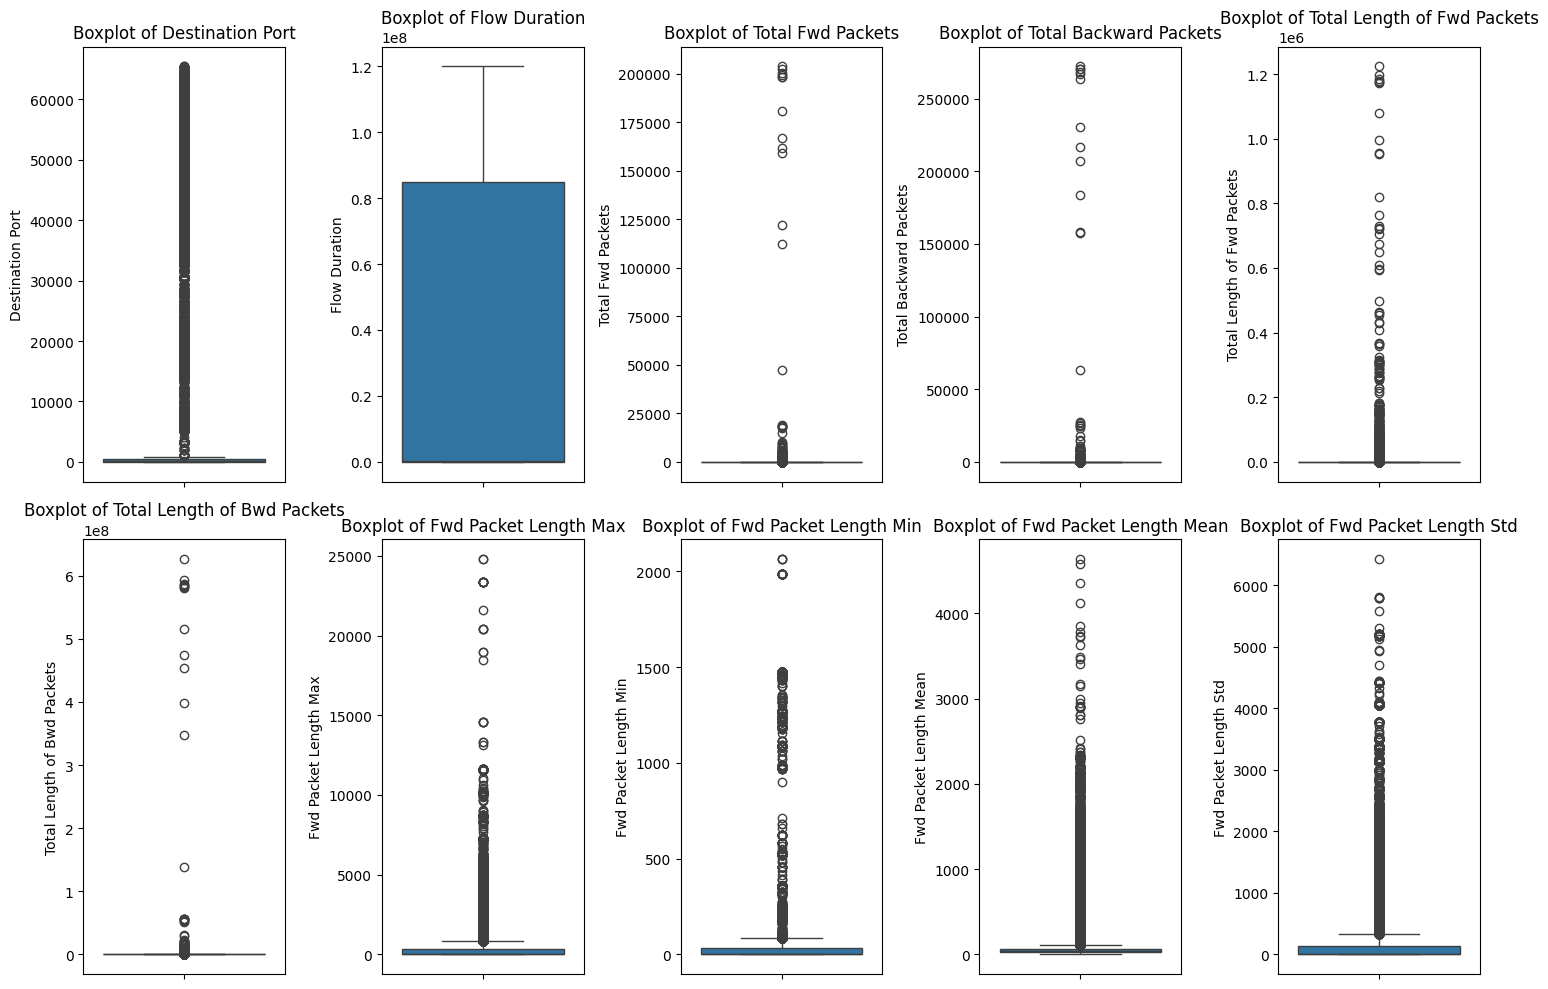

In [21]:
# Select numerical columns from df1 for outlier visualization
numerical_cols_df1 = df1.select_dtypes(include=np.number).columns.tolist()

# Plot boxplots for a subset of numerical columns to visualize outliers
num_plots = min(len(numerical_cols_df1), 10)  # Limit the number of plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_df1[:num_plots]):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(data=df1, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**5.ENCODING**


Implement the chosen feature selection methods by encoding the target variable



In [22]:
# 1. Encode the 'Label' column
label_encoder = LabelEncoder()
df1['Label'] = label_encoder.fit_transform(df1['Label'])

# 2. Calculate the correlation matrix for numerical columns including the encoded label
numerical_cols_with_label = df1.select_dtypes(include=np.number).columns.tolist()
correlation_matrix_with_label = df1[numerical_cols_with_label].corr()

# 3. Extract and sort absolute correlation with the encoded Label
correlation_with_label = correlation_matrix_with_label['Label'].abs().sort_values(ascending=False)
print("Absolute Correlation with Encoded Label:")
display(correlation_with_label)

# 4. Separate features (X) and target (y)
X = df1.drop(['Label'], axis=1)
y = df1['Label']


Absolute Correlation with Encoded Label:


,Label
Label,1.000000
Fwd IAT Max,0.747350
Flow IAT Max,0.747040
Idle Max,0.746524
Fwd IAT Std,0.738187
Bwd Packet Length Mean,0.735394
Avg Bwd Segment Size,0.735394
Idle Mean,0.734738
Idle Min,0.722642
Bwd Packet Length Max,0.716288


**Visualizing the distribution of Label variable**

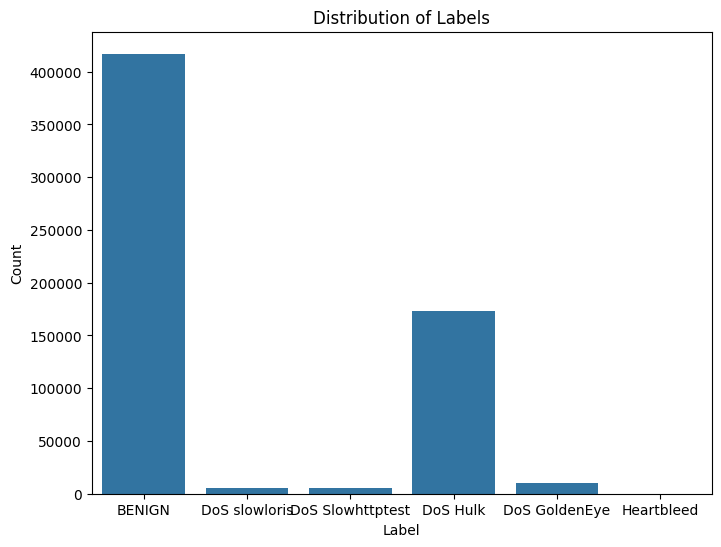

In [23]:
# Visualize the distribution of the target variable 'Label'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**6.spliting the data into training and testing sets**

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**7.Numerical Features**

In [25]:
numerical_cols_with_label

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'Down/Up Ratio',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Fwd Header Length.1',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',

**8.Remove the identified non-important features from the DataFrame**



In [26]:
# Remove the non-important columns from df1
non_important_features = ['Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Down/Up Ratio', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'act_data_pkt_fwd', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
df1.drop(columns=non_important_features, inplace=True)

print("DataFrame shape after removing non-important features:")
display(df1.shape)
print("\nColumns in the DataFrame after removing non-important features:")
display(df1.columns.tolist())

DataFrame shape after removing non-important features:


(610794, 33)


Columns in the DataFrame after removing non-important features:


['Destination Port',
 'Flow Duration',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Packet Length Variance',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Fwd Header Length.1',
 'Subflow Bwd Bytes',
 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward',
 'min_seg_size_forward',
 'Label']

checking the removal of non-important features

In [27]:
#printing the columns and rows after removing non-important features
print("Shape of the DataFrame after removing non-important features:")
display(df1.shape)
print("\nColumns in the DataFrame after removing non-important features:")
display(df1.columns.tolist())

Shape of the DataFrame after removing non-important features:


(610794, 33)


Columns in the DataFrame after removing non-important features:


['Destination Port',
 'Flow Duration',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Packet Length Variance',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Fwd Header Length.1',
 'Subflow Bwd Bytes',
 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward',
 'min_seg_size_forward',
 'Label']

**Saving the Encoded Version in to drive**

In [28]:
# Define the path to save the encoded dataset in your Google Drive
output_path_encoded = '/content/drive/MyDrive/encoded_wednesday_dataset.csv'

# Save the encoded DataFrame to a CSV file
df1.to_csv(output_path_encoded, index=False)

print(f"Encoded dataset saved to: {output_path_encoded}")

Encoded dataset saved to: /content/drive/MyDrive/encoded_wednesday_dataset.csv


**Module 3 Feature Engineering and Selecon**

1.Analysing feature importance

Clarification of 'Important' and 'Non-Important' Features for Botnet Detection:

In the context of building a botnet detection model, features are considered 'important' if they significantly contribute to distinguishing between 'BENIGN' (normal) network traffic and 'BOT' (malicious botnet) traffic.
These features are expected to have different distributions, patterns, or values for the two classes.

Criteria for 'Important' Features:
- Strong correlation with the 'Label' (target variable).
- High feature importance scores obtained from tree-based models (like RandomForest or Decision Tree) or coefficients from linear models (like Logistic Regression).
- Features that show clear visual separation or different statistical properties between the 'BENIGN' and 'BOT' classes.

'Non-Important' Features, conversely, are those that do not provide significant discriminative power between the classes.
Criteria for 'Non-Important' Features:
- Very low or no correlation with the 'Label'.
- Low feature importance scores from models.
- Features with similar distributions or statistical properties for both 'BENIGN' and 'BOT' traffic.
- Features with very low variance or unique values (as identified and removed in previous steps).

The goal is to identify and potentially focus on the 'important' features for model training to improve performance and interpretability, while potentially excluding 'non-important' ones to reduce noise and complexity.

**Based on the nature of the dataset and the goal of identifying features important for classification, I will select Correlation Analysis and Model-based Feature Importance as appropriate methods. Correlation analysis helps understand linear relationships between numerical features and the target, while model-based methods, particularly from tree-based models, are effective in assessing feature relevance for non-linear relationships and complex interactions often present in network traffic data.**



**Selected Feature Selection Methods:**
1. Correlation Analysis: This method helps to understand the linear relationship between individual numerical features and the target variable ('Label'). While the target is categorical, we can analyze the correlation with the numerical representation of the target (after encoding). Features with high absolute correlation values are likely to be important.



## Implement feature selection (Correlation Analysis)


**2.Correlation using heatmap**

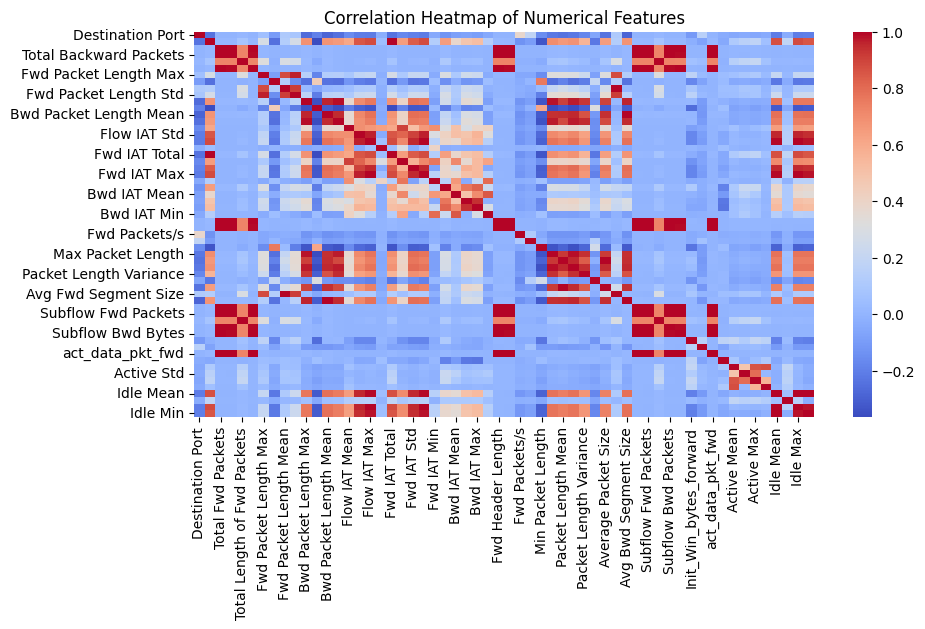

In [29]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False) # Set annot=True to see correlation values
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Correlation Matrix**

In [30]:
# Display the correlation matrix
print("Correlation Matrix of Numerical Features:")
display(correlation_matrix)

Correlation Matrix of Numerical Features:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.236650,-0.003992,-0.003765,0.011162,-0.003044,0.054263,-0.099767,0.113394,0.086857,...,-0.003024,-0.036756,-0.050746,-0.038060,-0.057333,-0.040648,-0.203513,-0.037074,-0.205588,-0.200030
Flow Duration,-0.236650,1.000000,0.014201,0.013226,0.076978,0.011388,0.285255,-0.249981,0.129771,0.273544,...,0.011139,-0.045043,0.114264,0.156062,0.179233,0.057229,0.868534,0.181388,0.879050,0.851677
Total Fwd Packets,-0.003992,0.014201,1.000000,0.998900,0.726478,0.995874,0.007955,-0.004098,-0.000627,0.000639,...,0.999660,-0.005713,0.006588,0.005781,0.008182,0.004629,-0.001506,0.000451,-0.001436,-0.001577
Total Backward Packets,-0.003765,0.013226,0.998900,1.000000,0.725832,0.992630,0.007535,-0.003617,-0.000965,0.000253,...,0.998407,-0.005669,0.005490,0.004099,0.006446,0.004478,-0.001922,-0.000002,-0.001918,-0.001946
Total Length of Fwd Packets,0.011162,0.076978,0.726478,0.725832,1.000000,0.720753,0.318980,-0.012939,0.293587,0.263604,...,0.726103,-0.006269,0.144109,0.181549,0.202072,0.066368,0.014731,0.011674,0.016238,0.013303
Total Length of Bwd Packets,-0.003044,0.011388,0.995874,0.992630,0.720753,1.000000,0.005419,-0.003062,-0.001977,-0.001121,...,0.996286,-0.005321,0.003614,0.002064,0.003750,0.003257,-0.001540,-0.000197,-0.001558,-0.001531
Fwd Packet Length Max,0.054263,0.285255,0.007955,0.007535,0.318980,0.005419,1.000000,-0.081142,0.881179,0.965479,...,0.006303,0.039506,0.060654,0.089156,0.107170,0.028954,0.205121,0.020559,0.204837,0.202638
Fwd Packet Length Min,-0.099767,-0.249981,-0.004098,-0.003617,-0.012939,-0.003062,-0.081142,1.000000,0.131853,-0.144676,...,-0.002939,0.029840,-0.048205,-0.039166,-0.056276,-0.037225,-0.218934,-0.037857,-0.220955,-0.215375
Fwd Packet Length Mean,0.113394,0.129771,-0.000627,-0.000965,0.293587,-0.001977,0.881179,0.131853,1.000000,0.910701,...,-0.000633,0.049210,0.047670,0.085641,0.081218,0.009245,0.112872,0.013665,0.113962,0.111580
Fwd Packet Length Std,0.086857,0.273544,0.000639,0.000253,0.263604,-0.001121,0.965479,-0.144676,0.910701,1.000000,...,-0.000114,0.041325,0.044028,0.072709,0.082393,0.016309,0.231370,0.019588,0.230934,0.229318


**3.Standardization**

In [54]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**Principle Component Analysis (PCA)**

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.fit_transform(X_test_scaled)

In [50]:
pca.explained_variance_

array([17.29883441, 11.18980881])

In [51]:
pca.explained_variance_ratio_

array([0.29825516, 0.19292734])

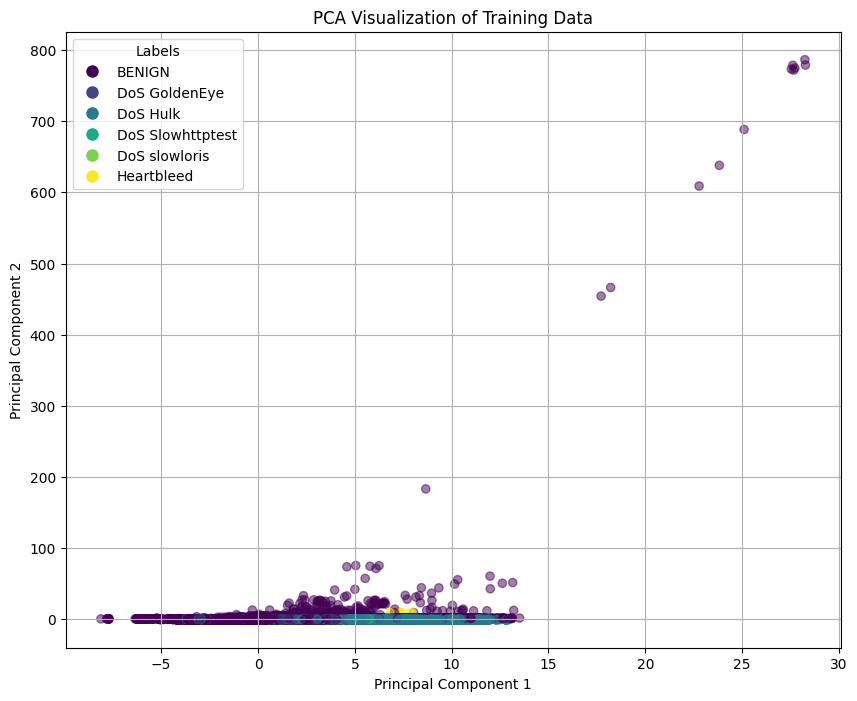

In [52]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Create a legend for the colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=scatter.cmap(scatter.norm(value)), markersize=10)
                   for value, label in enumerate(label_encoder.classes_)]
plt.legend(handles=legend_elements, title='Labels')
plt.grid(True)
plt.show()

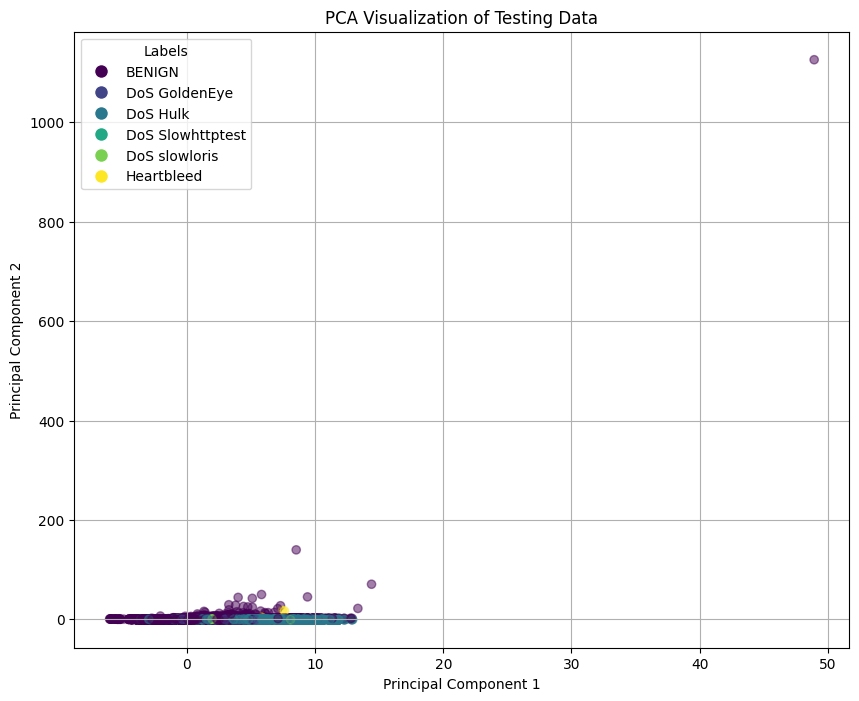

In [56]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.title('PCA Visualization of Testing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Create a legend for the colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                              markerfacecolor=scatter.cmap(scatter.norm(value)), markersize=10)
                   for value, label in enumerate(label_encoder.classes_)]
plt.legend(handles=legend_elements, title='Labels')
plt.grid(True)
plt.show()

**Module 4 Model Building and Training (Supervised Learning)**

**4.1 Random Forest Classifier**

In [31]:
#Instantiate a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [32]:
#Train the RandomForestClassifier model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [33]:
#Get and sort feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances from RandomForestClassifier:")
display(feature_importances)


Feature Importances from RandomForestClassifier:


,0
Packet Length Variance,0.112942
Bwd Packet Length Std,0.098760
Avg Bwd Segment Size,0.089670
Bwd Packet Length Max,0.059049
Bwd Packet Length Mean,0.057983
Packet Length Std,0.054142
Packet Length Mean,0.052409
Total Length of Bwd Packets,0.041835
Average Packet Size,0.036229
Subflow Bwd Bytes,0.033810


**Prediction**

In [34]:
y_pred = rf_model.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, ..., 2, 0, 2])

In [36]:
print(y_pred)

[0 0 0 ... 2 0 2]


In [37]:
import pandas as pd
file_path2 = '/content/drive/MyDrive/encoded_wednesday_dataset.csv'
df2 = pd.read_csv(file_path2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610794 entries, 0 to 610793
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             610794 non-null  int64  
 1   Flow Duration                610794 non-null  int64  
 2   Total Length of Bwd Packets  610794 non-null  int64  
 3   Fwd Packet Length Max        610794 non-null  int64  
 4   Fwd Packet Length Min        610794 non-null  int64  
 5   Fwd Packet Length Mean       610794 non-null  float64
 6   Fwd Packet Length Std        610794 non-null  float64
 7   Bwd Packet Length Max        610794 non-null  int64  
 8   Bwd Packet Length Min        610794 non-null  int64  
 9   Bwd Packet Length Mean       610794 non-null  float64
 10  Bwd Packet Length Std        610794 non-null  float64
 11  Flow IAT Mean                610794 non-null  float64
 12  Flow IAT Std                 610794 non-null  float64
 13 

**VISUALIZATION**

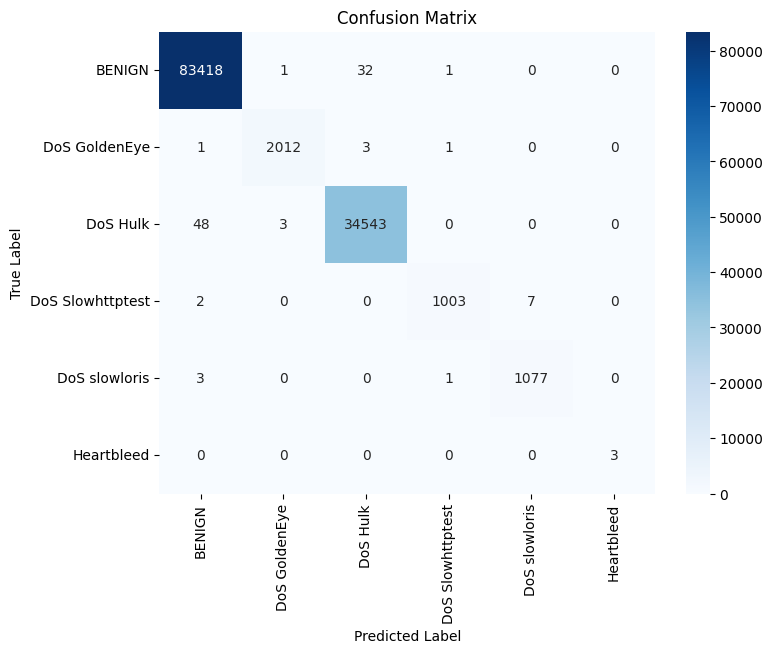

In [38]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

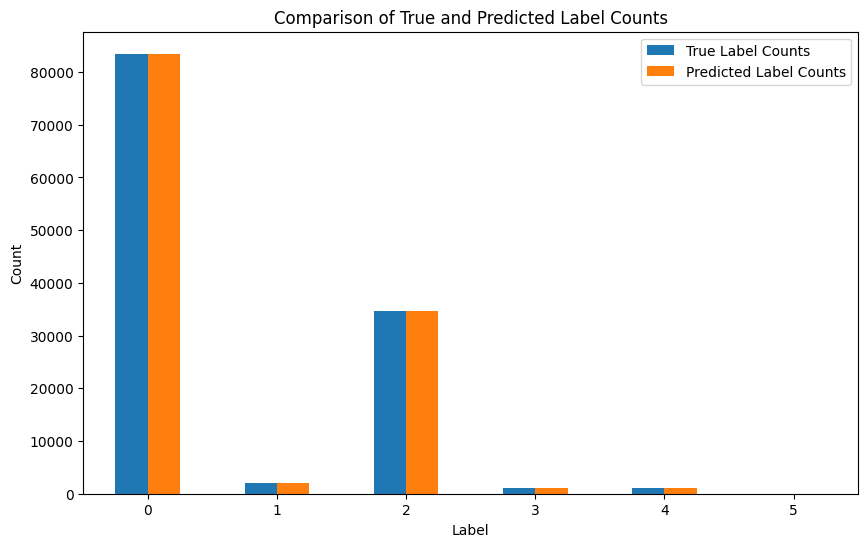

In [39]:
# Convert y_test and y_pred to pandas Series for easier plotting
y_test_series = pd.Series(y_test, name='True Label')
y_pred_series = pd.Series(y_pred, name='Predicted Label')

# Get value counts for both true and predicted labels
true_label_counts = y_test_series.value_counts().sort_index()
predicted_label_counts = y_pred_series.value_counts().sort_index()

# Combine the counts into a single DataFrame for plotting
comparison_df = pd.DataFrame({'True Label Counts': true_label_counts,
                             'Predicted Label Counts': predicted_label_counts})

# Plot the comparison using a bar plot
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of True and Predicted Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.show()

**4.2 METRICS**

**Evaluating Accuracy,Precision,Recall,F1-Score**

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate common classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in label_encoder.classes_]))

Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992
F1-score: 0.9992

Classification Report:
                  precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00     83452
   DoS GoldenEye       1.00      1.00      1.00      2017
        DoS Hulk       1.00      1.00      1.00     34594
DoS Slowhttptest       1.00      0.99      0.99      1012
   DoS slowloris       0.99      1.00      0.99      1081
      Heartbleed       1.00      1.00      1.00         3

        accuracy                           1.00    122159
       macro avg       1.00      1.00      1.00    122159
    weighted avg       1.00      1.00      1.00    122159

